# Sales analysis project

In this project we are going to pretend that we are working for buisness company and we will solve  real world tasks. We are going to analyze and visualize our results.

In [1]:
#Importing library
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn import cm

### Merging multiple csv file into one

In [2]:
#making variable with all csv files from same directory
files=[file for file in os.listdir("./Sales_Data")]

#Printing  all files
for file in files:
    print(file)

Sales_March_2019.csv
Sales_May_2019.csv
Sales_January_2019.csv
Sales_June_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_September_2019.csv
Sales_December_2019.csv
Sales_October_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv


In [3]:
#Making new dataframe with concenated files into one
all_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_data=pd.concat([all_data,df])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [4]:
#making csv file from merged dataframe
all_data.to_csv("sales_per_month",index=False)

## Data exploring

In [5]:
#reading new csv file 
df=pd.read_csv("sales_per_month")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [6]:
#shape of daataframe
df.shape

(186850, 6)

In [7]:
# unique values of certain columns
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [8]:
#calculating null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Since we have 545 null values and 186 850 rows we will just drop all rows with null values.

In [9]:
#droping null values
df2=df.dropna()

We found that we have some kind of mistakes in our dataset so let's clean it.

In [10]:
#finding errors in dataframe
errors=df2[df2["Order Date"].str[:2]=="Or"]
errors.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
#removing all rows that have value "Or" in Order Date column
df3=df2[df2["Order Date"].str[:2]!="Or"]
df3.shape

(185950, 6)

In [12]:
df4=df3.copy()

In [13]:
# making column with months
df4["Month"]=df3["Order Date"].str[:2].astype("int")
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 11.3+ MB


Before we move on we need to convert Quantity Ordered and Price Each columns into numerical.

In [15]:
#converting columns into integer and float
df4["Quantity Ordered"]=df4["Quantity Ordered"].astype("int")
df4["Price Each"]=df4["Price Each"].astype("float")

In [16]:
#making sales column by muliplying quantity order and price
df4["Sales"]=df4["Quantity Ordered"]*df4["Price Each"]

In [17]:
#making city column
df4["City"]=df4["Purchase Address"].apply(lambda x: x.split(",")[1]+ " " + x.split(",")[2].split(" ")[1])
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin TX
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin TX
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin TX
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco CA
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco CA


## Best month for sales

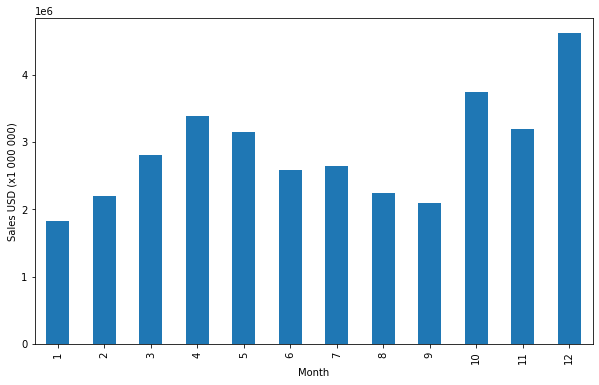

In [18]:
#calculating how much sales were in certain month
plt.figure(figsize=(10,6))
df4.groupby("Month")["Sales"].sum().plot.bar()
plt.ylabel("Sales USD (x1 000 000)")
plt.show()

In [19]:
#numeric values of sales per month
df4.groupby("Month")["Sales"].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

We can see that in December we got the most sales (4.6 milion USD)

## City with highest sales

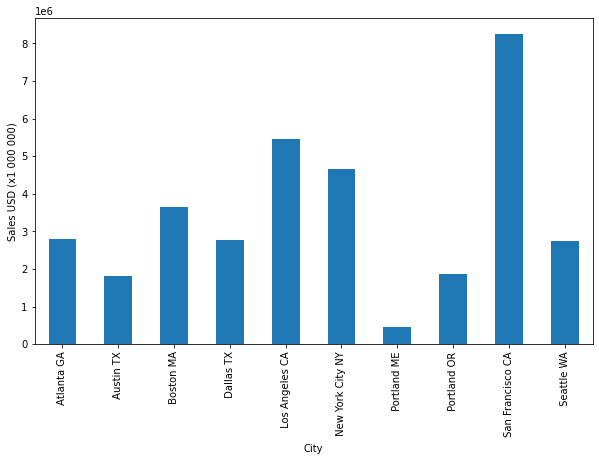

In [20]:
#d calculating how much sales were per cities
plt.figure(figsize=(10,6))
df4.groupby("City")["Sales"].sum().plot.bar()
plt.ylabel("Sales USD (x1 000 000)")
plt.show()

In [21]:
#numeric values of sales per city
df4.groupby("City")["Sales"].sum()

City
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: Sales, dtype: float64

The most sales were in San Francisco(8.26 milion USD)

## Time of displaying advertisment to maximize likelihood of customer's buying product

In [22]:
#converting into datetime
df4["Order Date"]=pd.to_datetime(df4["Order Date"])

In [23]:
#making hour and minute column
df4["Hour"]=df4["Order Date"].dt.hour
df4["Minute"]=df4["Order Date"].dt.minute
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin TX,20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin TX,20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin TX,20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco CA,5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco CA,0,1


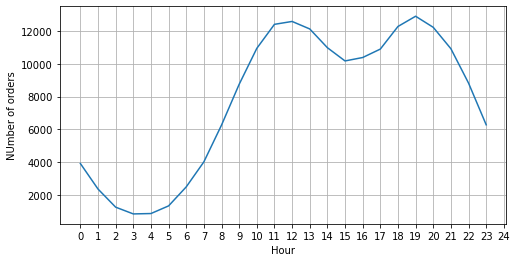

In [24]:
#plotting time of ordering
plt.figure(figsize=(8,4))
df4.groupby("Hour")["Hour"].count().plot()
plt.xlabel("Hour")
plt.ylabel("NUmber of orders")
plt.xticks(range(0,25))
plt.grid()
plt.show()

We can see that the most orders are between 11:00 and 12:00 and 18:00 and 19:00 hour.

## Products most often sold together

We are going to look products with same order ids.

In [25]:
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin TX,20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin TX,20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin TX,20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco CA,5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco CA,0,1


We can see that Lightning Charging Cable and Wired Headphones are in same order.

In [26]:
#making new dataframe with product that are sold together
products=df4[df4["Order ID"].duplicated(keep=False)]
products.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin TX,20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin TX,20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin TX,20,59
30,162037,iPhone,1,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles CA,2,11
31,162037,Lightning Charging Cable,1,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles CA,2,11
60,162066,AA Batteries (4-pack),1,3.84,2019-03-13 13:57:00,"602 Pine St, New York City, NY 10001",3,3.84,New York City NY,13,57
61,162066,USB-C Charging Cable,2,11.95,2019-03-13 13:57:00,"602 Pine St, New York City, NY 10001",3,23.90,New York City NY,13,57
66,162071,Vareebadd Phone,1,400.00,2019-03-30 20:23:00,"334 Jackson St, Atlanta, GA 30301",3,400.00,Atlanta GA,20,23
67,162071,USB-C Charging Cable,1,11.95,2019-03-30 20:23:00,"334 Jackson St, Atlanta, GA 30301",3,11.95,Atlanta GA,20,23
78,162082,Vareebadd Phone,1,400.00,2019-03-09 14:15:00,"401 Wilson St, New York City, NY 10001",3,400.00,New York City NY,14,15


In [27]:
products_2=products.copy()

In [28]:
#making column with all products in same order
products_2["Products in order"]=products.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
products_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Products in order
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin TX,20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin TX,20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin TX,20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles CA,2,11,"iPhone,Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles CA,2,11,"iPhone,Lightning Charging Cable"


In [29]:
#droping duplicates
products_order=products_2[["Order ID","Products in order"]].drop_duplicates()
products_order.head(10)

,Order ID,Products in order
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"
84,162087,"Google Phone,USB-C Charging Cable"
90,162092,"Flatscreen TV,AAA Batteries (4-pack)"
141,162142,"Vareebadd Phone,AA Batteries (4-pack)"
161,162161,"Wired Headphones,AAA Batteries (4-pack)"
188,162187,"Google Phone,USB-C Charging Cable"


In [30]:
from itertools import combinations
from collections import Counter

In [31]:
#counting unique pair of 2 products 
count=Counter()
for row in products_order["Products in order"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2))) # 2 pair
# printing most common products   
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [32]:
#counting unique pair of 3 products 
count=Counter()
for row in products_order["Products in order"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,3))) # 3 pair
# printing most common products    
for key,value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


##  Products that sold the most

In [33]:
#counting how many each product has been ordered
items=df4.groupby("Product")["Quantity Ordered"].sum()
items

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

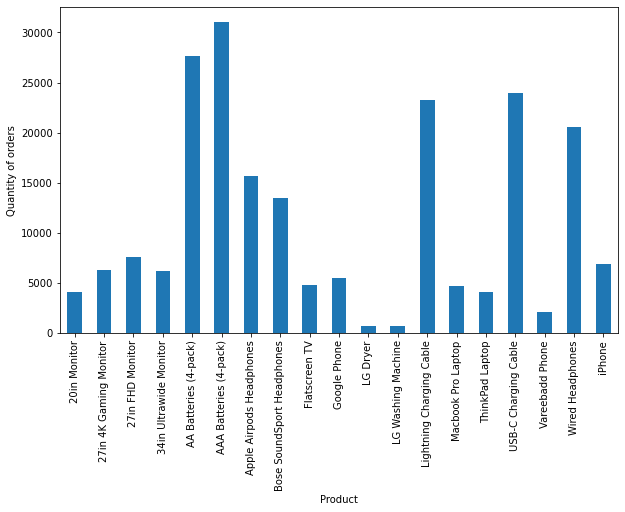

In [34]:
#plotting how many time product was ordered
plt.figure(figsize=(10,6))
df4.groupby("Product")["Quantity Ordered"].sum().plot.bar()
plt.ylabel("Quantity of orders")
plt.show()

AA Batteries (4_pack) is the most sold product.

In [35]:
#average price of products
prices=df4.groupby("Product")["Price Each"].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

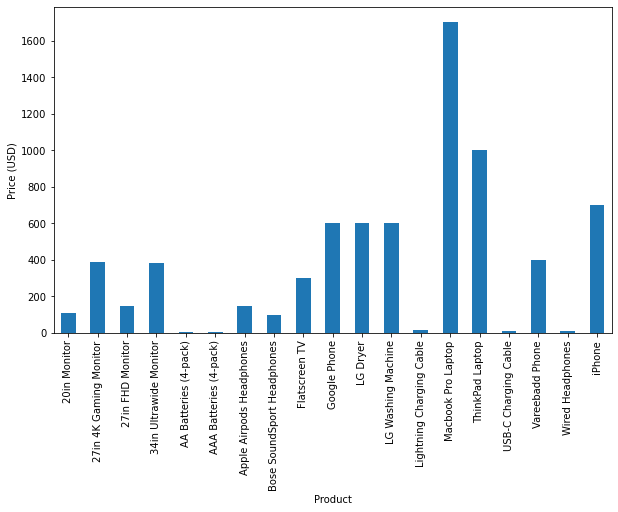

In [36]:
# plotting average price for each product 
plt.figure(figsize=(10,6))
df4.groupby("Product")["Price Each"].mean().plot.bar()
plt.ylabel("Price (USD)")
plt.show()

<ipython-input-65-0180cbf16422>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-65-0180cbf16422>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


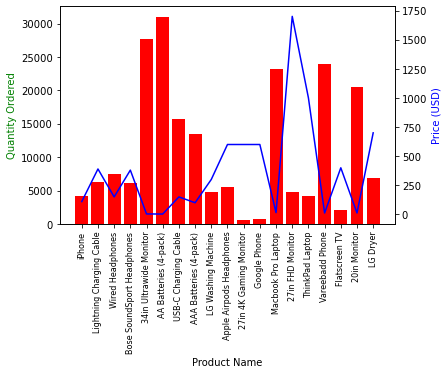

In [65]:
#plotting bar chart and plot on same graph to understand why does some products sell more or less
keys=df4["Product"].unique()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys, items, color='r')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price (USD)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

From the chart above, we see that cheap products are sold the most, and expensive ones less.